## Data Cleaning 

In [1]:
# import librariesy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
%matplotlib inline

In [45]:
raw_df = pd.read_csv('~/Downloads/stack-overflow-bqresults.csv')

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 4 columns):
id       250000 non-null int64
title    80283 non-null object
body     250000 non-null object
tags     80284 non-null object
dtypes: int64(1), object(3)
memory usage: 7.6+ MB


In [46]:
# 80284 non-null types and title out of 250000 entries
# remove observations without tags or title 
raw_df.dropna(inplace=True)

In [47]:
# make remove html tags from body
raw_df['body'] = raw_df.body.apply(lambda x: BeautifulSoup(x).get_text())

### Check for top 10 tags and find most relevant topics for classification 

In [6]:
raw_df.tags.value_counts()[10:20]

angularjs               195
c#|.net                 175
vim                     172
css                     170
c++                     161
ruby                    155
mysql                   148
git|github              117
ruby-on-rails           110
javascript|angularjs    107
Name: tags, dtype: int64

## We will focus on these five topics:

* git - version_control
* android 
* javascript
* python 
* sql

### Topic 1: Git related (version_control)

In [48]:
# change anyting has git in it as version control topic 
raw_df['topic'] = raw_df.tags.apply(lambda x: 'git_related' if re.search(
    '(^git|git$)', x.lower()) and 'digit' not in x else x)

# didn't get this osx|git|gitignore  

In [49]:
def check_topic(L1, L2):
    '''
    inputs:
    L1: a list of strings, a list of tag words in the specific topic 
    L2: a list of strings, tags converted from the column tags as a list of strings 
    outputs:
    return True or False if the L2 tag contains key word from the L1 
    '''
    L2 = [x.lower() for x in L2]
    for l1 in L1:
        if l1.lower() in L2:
            return True
    return False

### Topic2: anything has to do web fronted (javascript related)

In [135]:
# step two:
# change anyting has javascript as web development
javascript = ['javascript','json','node.js','*.js']
raw_df['topic'] = raw_df.topic.apply(
    lambda x: 'javascript_related' if check_topic(javascript, x.split('|')) else x)

### Topic3: anything has to do android 

In [77]:
# change anyting contains android as android topic
raw_df['topic'] =raw_df.topic.apply(
    lambda x: 'android_related' if check_topic(['android','android-studio'],x.split('|')) else x)

### Topic4: python related 

In [93]:
raw_df['topic'] = raw_df.topic.apply(
    lambda x: 'python_related' if 
    check_topic(['python', 'pandas', 'matplotlib', 'ipython', 'ipython-notebook'], x.split('|')) 
    else x)

### Topic 5: sql based

In [53]:
raw_df['topic'] =raw_df.topic.apply(
    lambda x: 'sql_related' if 'sql' in x.lower() else x)

### Topic 6: iphone

In [132]:
raw_df['topic'] =raw_df.topic.apply(
    lambda x: 'iphone_related' if check_topic(['iphone','ios5','ios6','ios8'],x.split('|')) else x)

### Topic 7: ruby

In [138]:
raw_df['topic'] = raw_df.topic.apply(
    lambda x: 'ruby_related' 
    if check_topic(['ruby', 'ruby-on-rails'], x.split('|')) else x)


### Topic java and c# and c++ but no overlap 

* c++ has no overlap with c# or java 

In [148]:
commom_rows = raw_df.topic.apply(lambda x: 
                   (check_topic(['c#'],x.split('|')))
                   and (check_topic(['java'],x.split('|'))))
# remove these common rows for c# and java 

In [146]:
raw_df['topic'] = raw_df.topic.apply(
    lambda x: 'c++_related' 
    if check_topic(['c\+\+'], x.split('|')) else x)



In [150]:
raw_df['topic'] = raw_df[~commom_rows].topic.apply(
    lambda x: 'c#_related' 
    if check_topic(['c#'], x.split('|')) else x)

In [155]:
raw_df['topic'] = raw_df[~commom_rows].topic.apply(
    lambda x: 'java_related' 
    if check_topic(['java'], x.split('|')) else x)

In [170]:
list_counts = raw_df.topic.value_counts()[:9].values
                                                    
names = raw_df.topic.value_counts()[:9].index


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

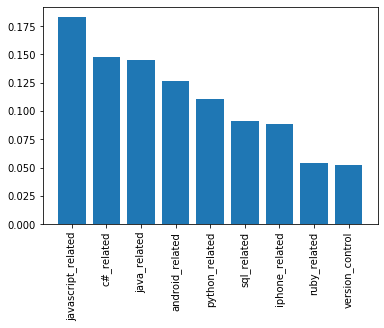

In [173]:
plt.bar(names, list_counts/np.sum(list_counts))
plt.xticks(rotation = 90)

In [49]:
raw_df.tags.str.contains('javascript').sum()

7024

git                  531  2655
android              500   5839
javascript           460  7024
python               401  5145
javascript|jquery    339
java                 286
jquery               282 3416
html|css             253  3502, 2761
c#                   217   7207
php                  216  2811

angularjs               195  1178
c#|.net                 175  6634
vim                     172
css                     170  2761
c++                     161 4030
ruby                    155  2844
mysql                   148  4390
git|github              117
ruby-on-rails           110
javascript|angularjs    107


In [73]:
raw_df.tags.str.contains("").sum()

4390

In [ ]:
raw_df.tags

In [ ]:
# bring python topic into next category 

In [ ]:
# bring java into next category 

In [ ]:
# bring c# into next category

In [ ]:
# step three:
# change anything that has 

In [ ]:
raw_df[raw_df.topic.apply(lambda x: '|'.join(x)).str.contains('android')]

In [ ]:
# make sure to not double count, only replace things have git as git 

In [ ]:
raw_df.tags = raw_df.tags.str.split('|')

In [ ]:
# replace anything match git related as the word git 
raw_df.tags.apply(lambda tag: set('git' if re.match('(^git|git$)',x) else x for x in tag))

In [ ]:
temp_df = pd.DataFrame(pd.concat([pd.Series(row['id'], row['tags'].split('|'))
           for _, row in raw_df.iterrows()])).reset_index()

In [ ]:
temp_df.rename(columns = {'index':'tags',0:'id'}, inplace = True)

In [ ]:
split_df = pd.merge(temp_df, raw_df,on='id')

In [ ]:
split_df.drop(columns = ['tags_y'], inplace=True)

In [ ]:
split_df.rename(columns={'tags_x':'tags'}, inplace = True)

In [ ]:
split_df.head()

# should be able to merge a few tags and use common sense to make them into the same tag category
